In [1]:
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

sys.path.append('../models_new')
import model_utils_new as util
from construct_model_matrices_random  import ModelMatrixConstructor

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
DATA_DIR = '../../data/Xy_random_split_data'
TEST = False

In [3]:
matrix_constructor = ModelMatrixConstructor(DATA_DIR, TEST)
matrix_constructor.construct_model_matrices()

Loading data from ['X_train_1998.csv', 'X_train_1999.csv', 'X_train_2000.csv', 'X_train_2001.csv', 'X_train_2002.csv', 'X_train_2003.csv', 'X_train_2004.csv', 'X_train_2005.csv', 'X_train_2006.csv', 'X_train_2007.csv', 'X_train_2008.csv', 'X_train_2009.csv', 'X_train_2010.csv', 'X_train_2011.csv', 'X_train_2012.csv', 'X_train_2013.csv', 'X_train_2014.csv', 'X_train_2015.csv']...
Loading data from ['X_valid_1998.csv', 'X_valid_1999.csv', 'X_valid_2000.csv', 'X_valid_2001.csv', 'X_valid_2002.csv', 'X_valid_2003.csv', 'X_valid_2004.csv', 'X_valid_2005.csv', 'X_valid_2006.csv', 'X_valid_2007.csv', 'X_valid_2008.csv', 'X_valid_2009.csv', 'X_valid_2010.csv', 'X_valid_2011.csv', 'X_valid_2012.csv', 'X_valid_2013.csv', 'X_valid_2014.csv', 'X_valid_2015.csv']...
Loading data from ['X_test_1998.csv', 'X_test_1999.csv', 'X_test_2000.csv', 'X_test_2001.csv', 'X_test_2002.csv', 'X_test_2003.csv', 'X_test_2004.csv', 'X_test_2005.csv', 'X_test_2006.csv', 'X_test_2007.csv', 'X_test_2008.csv', 'X_test_

In [4]:
test_vars = matrix_constructor.get_variables(random=True)
test_vars = sorted(test_vars)
test_vars

fixed: ['density', 'btl_t1', 'lon_cub', 'age_sq', 'etopo1', 'lon:lat:etopo1', 'etopo1_sq', 'density_cub', 'lon', 'age', 'etopo1:sum9_diff', 'btl_t1:btl_t2', 'lat', 'sum9_diff_sq', 'vgt', 'sum9_diff', 'sum9_t1', 'lat:sum9_diff', 'sum9_t2', 'lon:sum9_diff', 'sum9_t1:sum9_t2', 'btl_t2', 'lat_cub', 'age_cub', 'lat_sq', 'sum9_diff_cub']
variables: ['mi', 'max.drop', 'AugTmean', 'summerP2', 'MarTmin', 'Tvar']


['AugTmean',
 'MarTmin',
 'Tvar',
 'age',
 'age_cub',
 'age_sq',
 'btl_t1',
 'btl_t1:btl_t2',
 'btl_t2',
 'density',
 'density:AugTmean',
 'density:MarTmin',
 'density:Tvar',
 'density:max.drop',
 'density:mi',
 'density:summerP2',
 'density_cub',
 'etopo1',
 'etopo1:AugTmean',
 'etopo1:MarTmin',
 'etopo1:Tvar',
 'etopo1:max.drop',
 'etopo1:mi',
 'etopo1:sum9_diff',
 'etopo1:summerP2',
 'etopo1_sq',
 'lat',
 'lat:AugTmean',
 'lat:MarTmin',
 'lat:Tvar',
 'lat:max.drop',
 'lat:mi',
 'lat:sum9_diff',
 'lat:summerP2',
 'lat_cub',
 'lat_sq',
 'lon',
 'lon:AugTmean',
 'lon:MarTmin',
 'lon:Tvar',
 'lon:lat:etopo1',
 'lon:max.drop',
 'lon:mi',
 'lon:sum9_diff',
 'lon:summerP2',
 'lon_cub',
 'max.drop',
 'mi',
 'sum9_diff',
 'sum9_diff_cub',
 'sum9_diff_sq',
 'sum9_t1',
 'sum9_t1:sum9_t2',
 'sum9_t2',
 'summerP2',
 'vgt']

In [5]:
def print_dims(data_set, name):
    print('%s:\n X: %r\n y: %r' 
          % (name, data_set[0].shape, data_set[1].shape))

In [6]:
for var in ['x', 'y', 'year']:
    test_vars.append(var)
test_vars

['AugTmean',
 'MarTmin',
 'Tvar',
 'age',
 'age_cub',
 'age_sq',
 'btl_t1',
 'btl_t1:btl_t2',
 'btl_t2',
 'density',
 'density:AugTmean',
 'density:MarTmin',
 'density:Tvar',
 'density:max.drop',
 'density:mi',
 'density:summerP2',
 'density_cub',
 'etopo1',
 'etopo1:AugTmean',
 'etopo1:MarTmin',
 'etopo1:Tvar',
 'etopo1:max.drop',
 'etopo1:mi',
 'etopo1:sum9_diff',
 'etopo1:summerP2',
 'etopo1_sq',
 'lat',
 'lat:AugTmean',
 'lat:MarTmin',
 'lat:Tvar',
 'lat:max.drop',
 'lat:mi',
 'lat:sum9_diff',
 'lat:summerP2',
 'lat_cub',
 'lat_sq',
 'lon',
 'lon:AugTmean',
 'lon:MarTmin',
 'lon:Tvar',
 'lon:lat:etopo1',
 'lon:max.drop',
 'lon:mi',
 'lon:sum9_diff',
 'lon:summerP2',
 'lon_cub',
 'max.drop',
 'mi',
 'sum9_diff',
 'sum9_diff_cub',
 'sum9_diff_sq',
 'sum9_t1',
 'sum9_t1:sum9_t2',
 'sum9_t2',
 'summerP2',
 'vgt',
 'x',
 'y',
 'year']

In [7]:
data_sets = matrix_constructor.select_variables(test_vars)
[[X_train, y_train], [X_valid, y_valid], [X_test, y_test]] = data_sets
for (data_set, name) in zip(data_sets, ['Train', 'Valid', 'Test']):
    print_dims(data_set, name)
    
X_train.head()

Train:
 X: (776354, 59)
 y: (776354, 1)
Valid:
 X: (97189, 59)
 y: (97189, 1)
Test:
 X: (97665, 59)
 y: (97665, 1)


,AugTmean,MarTmin,Tvar,age,age_cub,age_sq,btl_t1,btl_t1:btl_t2,btl_t2,density,...,sum9_diff_cub,sum9_diff_sq,sum9_t1,sum9_t1:sum9_t2,sum9_t2,summerP2,vgt,x,y,year
0,27.502499,4.376215,7.437778,0.0,0.0,0.0,0,0,0,847.500488,...,0,0,0,0,0,260.620229,0,-450000.0,-2040000.0,2015
1,25.295415,2.200347,7.102553,0.0,0.0,0.0,0,0,0,1251.626587,...,0,0,0,0,0,318.327508,0,-440000.0,-2040000.0,2015
2,26.787834,3.525477,7.342608,0.0,0.0,0.0,0,0,0,4498.790527,...,0,0,0,0,0,280.075993,0,-430000.0,-2040000.0,2015
3,27.379772,4.101569,7.451560,0.0,0.0,0.0,0,0,0,468.264038,...,0,0,0,0,0,259.864216,0,-420000.0,-2040000.0,2015
4,27.771246,4.428590,7.511856,0.0,0.0,0.0,0,0,0,3425.574951,...,0,0,0,0,0,243.690708,0,-410000.0,-2040000.0,2015


In [8]:
max(X_test.x), max(X_test.y)

(-140000.0, 1540000.0)

In [9]:
density_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'density')

matrix shape: (195, 357)


In [10]:
density_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'density')

matrix shape: (192, 355)


In [11]:
density_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'density')

matrix shape: (196, 350)


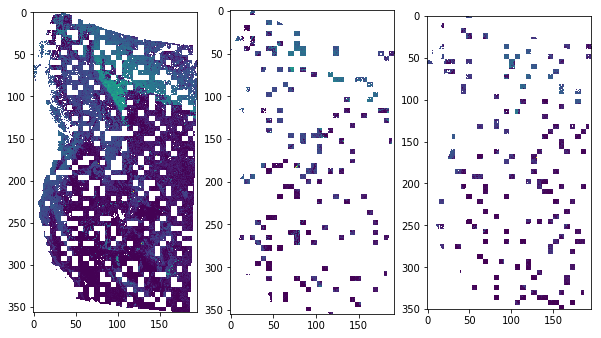

In [12]:
plt.figure(figsize=(10,8))
plt.subplot(1, 3, 1);
imshow(np.rot90(density_matrix_train));
plt.subplot(1, 3, 2);
imshow(np.rot90(density_matrix_valid));
plt.subplot(1, 3, 3);
imshow(np.rot90(density_matrix_test));

In [13]:
btl_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'btl_t1')
btl_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'btl_t1')
btl_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'btl_t1')

matrix shape: (195, 357)
matrix shape: (192, 355)
matrix shape: (196, 350)


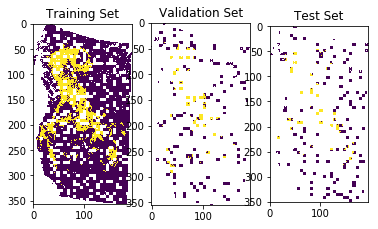

In [14]:
plt.subplot(1, 3, 1);
imshow(np.rot90(btl_matrix_train));
plt.title('Training Set');
plt.subplot(1, 3, 2);
imshow(np.rot90(btl_matrix_valid));
plt.title('Validation Set');
plt.subplot(1, 3, 3);
imshow(np.rot90(btl_matrix_test));
plt.title('Test Set');

In [15]:
util.print_percent_presence(y_train, 'y_train')
util.print_percent_presence(y_valid, 'y_valid')
util.print_percent_presence(y_test, 'y_test')

Percent presence in y_train: 12.99%
Percent presence in y_valid: 13.99%
Percent presence in y_test: 12.65%


In [16]:
print('Baseline accuracy if predicting "absent" for all cells:')
print('  train:', 100 - 12.99)
print('  valid:', 100 - 13.99)
print('  test: ', 100 - 12.65)

Baseline accuracy if predicting "absent" for all cells:
  train: 87.01
  valid: 86.01
  test:  87.35


In [17]:
y_train.columns=['btl_t']
y_valid.columns=['btl_t']
y_test.columns=['btl_t']

In [18]:
full_train = X_train.copy()
full_valid = X_valid.copy()
full_test = X_test.copy()

full_train['btl_t'] = y_train['btl_t']
full_valid['btl_t'] = y_valid['btl_t']
full_test['btl_t'] = y_test['btl_t']

In [19]:
drop = ['x', 'y', 'year']
X_train = X_train.drop(drop, axis=1)
X_valid = X_valid.drop(drop, axis=1)
X_test  = X_test.drop(drop, axis=1)

In [20]:
predictors = list(X_train)

In [21]:
predictors

['AugTmean',
 'MarTmin',
 'Tvar',
 'age',
 'age_cub',
 'age_sq',
 'btl_t1',
 'btl_t1:btl_t2',
 'btl_t2',
 'density',
 'density:AugTmean',
 'density:MarTmin',
 'density:Tvar',
 'density:max.drop',
 'density:mi',
 'density:summerP2',
 'density_cub',
 'etopo1',
 'etopo1:AugTmean',
 'etopo1:MarTmin',
 'etopo1:Tvar',
 'etopo1:max.drop',
 'etopo1:mi',
 'etopo1:sum9_diff',
 'etopo1:summerP2',
 'etopo1_sq',
 'lat',
 'lat:AugTmean',
 'lat:MarTmin',
 'lat:Tvar',
 'lat:max.drop',
 'lat:mi',
 'lat:sum9_diff',
 'lat:summerP2',
 'lat_cub',
 'lat_sq',
 'lon',
 'lon:AugTmean',
 'lon:MarTmin',
 'lon:Tvar',
 'lon:lat:etopo1',
 'lon:max.drop',
 'lon:mi',
 'lon:sum9_diff',
 'lon:summerP2',
 'lon_cub',
 'max.drop',
 'mi',
 'sum9_diff',
 'sum9_diff_cub',
 'sum9_diff_sq',
 'sum9_t1',
 'sum9_t1:sum9_t2',
 'sum9_t2',
 'summerP2',
 'vgt']

In [22]:
def scale_data(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test  = scaler.transform(X_test)
    return X_train, X_valid, X_test

In [23]:
X_train, X_valid, X_test = scale_data(X_train, X_valid, X_test) 

In [24]:
y_train = y_train['btl_t'].values.reshape(-1)
y_valid = y_valid['btl_t'].values.reshape(-1)
y_test  = y_test['btl_t'].values.reshape(-1)

In [25]:
# Find optimal regularization via best validation-set accuracy
l1_mods = []
#l2_mods = []
Cs = np.logspace(-4, 0, 5)
best_C = np.nan
best_accuracy = 0
t0 = time.time()
best_penalty = None

for C in Cs:
    print('Testing C =', C)
    #for penalty in ['l1', 'l2']: #['l1', 'l2']:
    penalty='l1'
    print('  %s:' % penalty, end=' ')
    logistic_clf = LogisticRegression(
        C=C, penalty=penalty, solver='saga', n_jobs=-1)
    logistic_clf.fit(X_train, y_train)
    preds = logistic_clf.predict(X_valid)
    accuracy = sum(y_valid == preds) / len(preds)
    a = [[pred, coef] for pred, coef in zip(predictors, logistic_clf.coef_[0])]
    sig_preds = []
    for pred, coef in a:
        if abs(coef) > 0:
            sig_preds.append(pred)
    print(sig_preds)
    if (accuracy > best_accuracy):
        best_C = C
        best_accuaracy = accuracy
        best_penalty = penalty
    print(' Accuracy:', round(accuracy, 4))
    if penalty == 'l1':
        l1_mods.append(accuracy)
    else:
        l2_mods.append(accuracy)
    print('Elapsed time: %.2f minutes\n' % ((time.time() - t0) / 60))

Testing C = 0.0001
  l1: ['age', 'btl_t1', 'btl_t2', 'lon:lat:etopo1', 'sum9_diff_sq', 'sum9_t1', 'sum9_t2', 'vgt']
 Accuracy: 0.9325
Elapsed time: 0.20 minutes

Testing C = 0.001
  l1: ['Tvar', 'age', 'age_cub', 'btl_t1', 'btl_t1:btl_t2', 'btl_t2', 'density', 'density:AugTmean', 'etopo1:summerP2', 'lat', 'lat:AugTmean', 'lat:sum9_diff', 'lon', 'lon:lat:etopo1', 'lon:mi', 'max.drop', 'sum9_diff_cub', 'sum9_diff_sq', 'sum9_t1', 'sum9_t1:sum9_t2', 'sum9_t2', 'summerP2', 'vgt']
 Accuracy: 0.9345
Elapsed time: 1.28 minutes

Testing C = 0.01
  l1: 

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


['AugTmean', 'Tvar', 'age', 'age_cub', 'age_sq', 'btl_t1', 'btl_t1:btl_t2', 'btl_t2', 'density', 'density:AugTmean', 'density:MarTmin', 'density:mi', 'density:summerP2', 'density_cub', 'etopo1', 'etopo1:AugTmean', 'etopo1:MarTmin', 'etopo1:Tvar', 'etopo1:mi', 'etopo1:sum9_diff', 'etopo1:summerP2', 'etopo1_sq', 'lat', 'lat:AugTmean', 'lat:MarTmin', 'lat:Tvar', 'lat:max.drop', 'lat:mi', 'lat:sum9_diff', 'lat_cub', 'lon', 'lon:AugTmean', 'lon:MarTmin', 'lon:mi', 'lon:sum9_diff', 'lon_cub', 'sum9_diff', 'sum9_diff_cub', 'sum9_diff_sq', 'sum9_t1:sum9_t2', 'sum9_t2', 'vgt']
 Accuracy: 0.9351
Elapsed time: 3.11 minutes

Testing C = 0.1
  l1: ['AugTmean', 'MarTmin', 'Tvar', 'age', 'age_cub', 'age_sq', 'btl_t1', 'btl_t1:btl_t2', 'btl_t2', 'density', 'density:AugTmean', 'density:MarTmin', 'density:Tvar', 'density:max.drop', 'density:mi', 'density:summerP2', 'density_cub', 'etopo1', 'etopo1:AugTmean', 'etopo1:MarTmin', 'etopo1:Tvar', 'etopo1:max.drop', 'etopo1:mi', 'etopo1:sum9_diff', 'etopo1:sum

In [26]:
!say "I'm done"

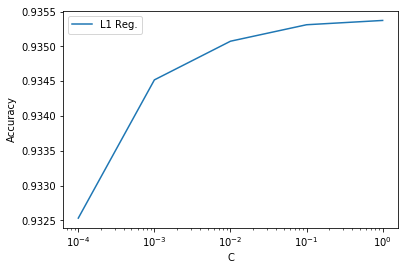

In [27]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
#plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [28]:
l1_mods = []
l2_mods = []
Cs = np.logspace(-1.5, 0, 4)

t0 = time.time()
for C in Cs:
    print('Testing C =', C)
    for penalty in ['l1', 'l2']:
        print('  %s:' % penalty, end=' ')
        logistic_clf = LogisticRegression(C=C, penalty=penalty, solver='saga', n_jobs=-1)
        logistic_clf.fit(X_train, y_train)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        print(round(accuracy, 4))
        if penalty == 'l1':
            l1_mods.append(accuracy)
        else:
            l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.03162277660168379
  l1: 

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9354
Elapsed time: 2.12 minutes
  l2: 0.9354
Elapsed time: 3.55 minutes
Testing C = 0.1
  l1: 0.9353
Elapsed time: 5.54 minutes
  l2: 0.9353
Elapsed time: 7.01 minutes
Testing C = 0.31622776601683794
  l1: 0.9354
Elapsed time: 8.82 minutes
  l2: 0.9353
Elapsed time: 10.20 minutes
Testing C = 1.0
  l1: 0.9354
Elapsed time: 12.05 minutes
  l2: 0.9353
Elapsed time: 13.61 minutes


In [29]:
!say "I'm done"

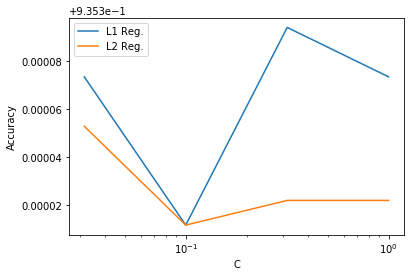

In [30]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [31]:
[(c, acc) for c, acc in zip(Cs, l2_mods)]

[(0.03162277660168379, 0.9353527662595561),
 (0.1, 0.9353116093385054),
 (0.31622776601683794, 0.935321898568768),
 (1.0, 0.935321898568768)]

In [32]:
best_C = 1

In [36]:
t0 = time.time()
logistic_clf = LogisticRegression(C=best_C, penalty='l1', solver='saga', n_jobs=-1)
logistic_clf.fit(X_train, y_train)
preds = logistic_clf.predict(X_test)
probs = logistic_clf.predict_proba(X_test)
accuracy = sum(y_test == preds) / len(preds)
print('Elapsed time: %.2f minutes\n' % ((time.time() - t0) / 60))
print('Accuracy:', accuracy)

Elapsed time: 2.01 minutes

Accuracy: 0.9396508472840833


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [37]:
def get_predictions_at_threshold(pred_ps, threshold):
    return 1 * (pred_ps >= threshold)

def threshold_plot(pred_ps, targets):
    thresholds = np.linspace(0, 1, 500)
    accuracies = []
    n = len(pred_ps)

    for threshold in thresholds:
        preds = get_predictions_at_threshold(pred_ps, threshold)
        accuracies.append((preds == targets).sum() / n)
        
    plt.plot(thresholds, accuracies);
    optimal_threshold = thresholds[np.argmax(accuracies)]
    optimal_accuracy = max(accuracies)
    plt.plot([optimal_threshold, optimal_threshold], 
             [min(accuracies), max(accuracies)], 
             'r')
    plt.plot([0, 1], [optimal_accuracy, optimal_accuracy], 'r')
    plt.xlabel('Threshold for predicting "Renewal"')
    plt.ylabel('Accuracy')
    plt.show()
    return {'threshold': optimal_threshold, 'accuracy': optimal_accuracy}

[[9.99998701e-01 1.29862306e-06]
 [9.99998750e-01 1.25003682e-06]
 [9.99998653e-01 1.34715078e-06]
 [9.99998753e-01 1.24693784e-06]
 [9.99998761e-01 1.23911403e-06]]


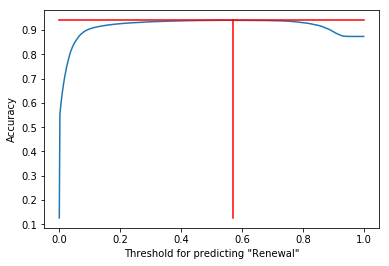

{'threshold': 0.5711422845691382, 'accuracy': 0.9402037577433062}


In [38]:
pred_ps = logistic_clf.predict_proba(X_test)
print(pred_ps[:5])
pred_ps = np.array([p[1] for p in pred_ps])
pred_ps[:5]

THRESHOLD = 0.5
preds = get_predictions_at_threshold(pred_ps, THRESHOLD)
preds[:5]

best_threshold = threshold_plot(pred_ps, y_test);
print(best_threshold)

In [39]:
cm = util.make_confusion_matrix(y_test, pred_ps, 0.5)
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	9425		2931
        0	2963		82346
Accuracy:  0.9396508472840833
Precision: 0.7608169195996125
Recall:    0.7627873098089997
F1:        0.761800840607824


In [40]:
cm = util.make_confusion_matrix(
    y_test, pred_ps, best_threshold['threshold'])
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	9005		3351
        0	2489		82820
Accuracy:  0.9402037577433062
Precision: 0.7834522359491909
Recall:    0.7287957267724182
F1:        0.7551362683438155


In [41]:
auc_metrics = util.get_auc(y_test, pred_ps)

AUC:       0.9704273280708741


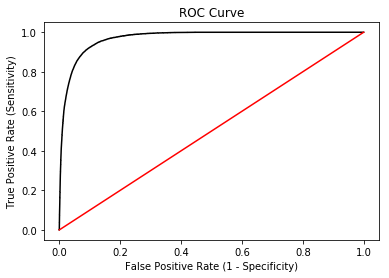

In [42]:
util.plot_roc(auc_metrics['fpr'], auc_metrics['tpr'])

In [43]:
coefs = pd.DataFrame(
    [[pred, coef] 
     for pred, coef in zip(predictors, logistic_clf.coef_[0])], 
    columns=['predictor', 'coef'])
coefs['abs'] = np.abs(coefs.coef)
coefs = coefs.sort_values('abs', ascending=False)
coefs = coefs.drop(['abs'], axis=1)
coefs

,predictor,coef
55,vgt,3.317389
33,lat:summerP2,2.378067
26,lat,1.992478
34,lat_cub,-1.851158
37,lon:AugTmean,1.699321
48,sum9_diff,-1.656888
2,Tvar,-1.642880
39,lon:Tvar,-1.592397
44,lon:summerP2,1.501995
43,lon:sum9_diff,-1.270409


In [44]:
print(full_train.shape)
#type(pred_ps_train)

(776354, 60)


In [45]:
logistic_clf.predict_proba(X_train)

array([[9.99998589e-01, 1.41082107e-06],
       [9.99998086e-01, 1.91371545e-06],
       [9.99998427e-01, 1.57326794e-06],
       ...,
       [9.99925607e-01, 7.43929812e-05],
       [9.99942627e-01, 5.73728161e-05],
       [9.99937960e-01, 6.20396289e-05]])

In [46]:
pred_ps_train = logistic_clf.predict_proba(X_train)
pred_ps_train = np.array([p[1] for p in pred_ps_train])

pred_ps_valid = logistic_clf.predict_proba(X_valid)
pred_ps_valid = np.array([p[1] for p in pred_ps_valid])

full_train['probs'] = pred_ps_train
full_train['preds'] = get_predictions_at_threshold(
    pred_ps_train, best_threshold['threshold'])


full_valid['probs'] = pred_ps_valid
full_valid['preds'] = get_predictions_at_threshold(
    pred_ps_valid, best_threshold['threshold'])

In [47]:
full_test['probs'] = pred_ps
full_test['preds'] = get_predictions_at_threshold(
    pred_ps, best_threshold['threshold'])
full_test.head()

,AugTmean,MarTmin,Tvar,age,age_cub,age_sq,btl_t1,btl_t1:btl_t2,btl_t2,density,...,sum9_t1:sum9_t2,sum9_t2,summerP2,vgt,x,y,year,btl_t,probs,preds
0,28.542564,4.892391,7.680772,0.0,0.0,0.0,0,0,0,1228.853027,...,0,0,212.845908,0,-390000.0,-2040000.0,2015,0,0.000001,0
1,28.728538,5.149851,7.721158,0.0,0.0,0.0,0,0,0,2.717600,...,0,0,202.513297,0,-380000.0,-2040000.0,2015,0,0.000001,0
2,28.714929,5.106586,7.752608,0.0,0.0,0.0,0,0,0,1885.977905,...,0,0,194.175411,0,-370000.0,-2040000.0,2015,0,0.000001,0
3,29.100471,5.414470,7.867620,0.0,0.0,0.0,0,0,0,498.758270,...,0,0,183.821681,0,-360000.0,-2040000.0,2015,0,0.000001,0
4,29.370663,5.694320,7.936995,0.0,0.0,0.0,0,0,0,3043.468262,...,0,0,169.318286,0,-350000.0,-2040000.0,2015,0,0.000001,0


In [48]:
def pred_plot(actual_matrix, pred_matrix, error_matrix, year):
    plt.subplot(131)
    imshow(np.rot90(actual_matrix));
    plt.title('%d Actual' % year);
    plt.subplot(132)
    imshow(np.rot90(pred_matrix));
    plt.title('%d Predicted' % year);
    plt.subplot(133)
    imshow(np.rot90(error_matrix));
    plt.title('%d Error' % year);

In [49]:
def make_actual_pred_and_error_matrices(
    data, year, pred_type='preds', plot=False):
    data_year = data.loc[data.year == year, :]
    actual_matrix = util.column2matrix(data_year, 'btl_t')
    pred_matrix   = util.column2matrix(data_year, pred_type)
    error_matrix  = pred_matrix - actual_matrix
    if plot:
        pred_plot(actual_matrix, pred_matrix, error_matrix, year)        
    return actual_matrix, pred_matrix, error_matrix

matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (195, 357)
matrix shape: (195, 357)


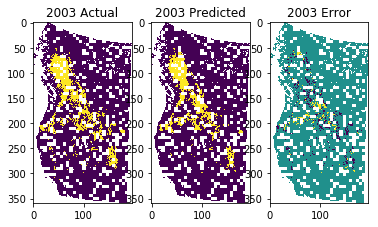

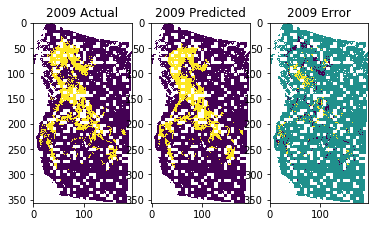

In [50]:
years = [2003, 2009]
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_train, year, plot=True)

matrix shape: (196, 351)
matrix shape: (196, 351)
matrix shape: (192, 355)
matrix shape: (192, 355)


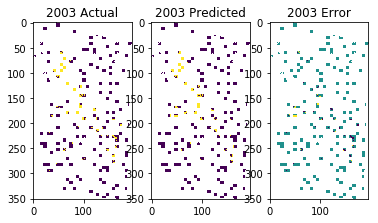

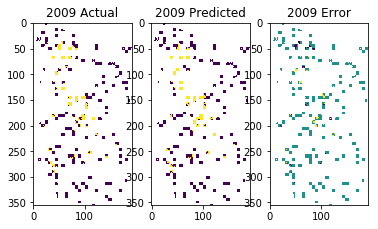

In [51]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_valid, year, plot=True)

matrix shape: (184, 346)
matrix shape: (184, 346)
matrix shape: (196, 350)
matrix shape: (196, 350)


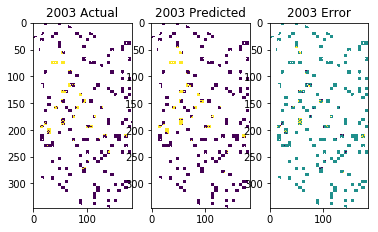

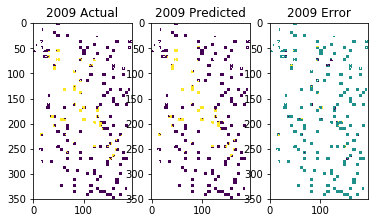

In [52]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_test, year, plot=True)

In [53]:
all_data = full_train.append(full_valid).append(full_test)
all_data.index = range(all_data.shape[0])

matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (196, 359)


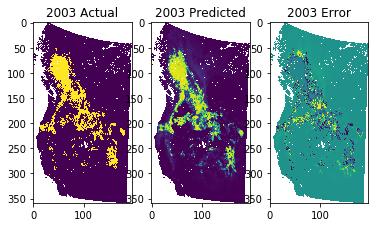

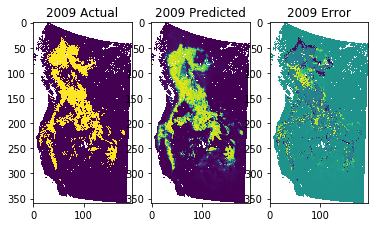

In [54]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(
        all_data, year, pred_type='probs', plot=True)

In [55]:
!say "I'm done"